In [1]:
import pandas as pd

In [59]:
# 處理單月
month3_data_df = pd.read_csv('data/group/3_B.csv', encoding='utf-8-sig')
month3_data_df['datetime'] = pd.to_datetime(month3_data_df['datetime'])

In [60]:
month3_data_df_16500 = month3_data_df[month3_data_df['strike_price']==16500]
month3_data_df_16500

,MTF_DATE,MTF_PROD_ID,MTF_BS_CODE,MTF_PRICE,MTF_QNTY,MTF_OC_CODE,strike_price,month_alpha,month,datetime
0,20210311,TXO16500C1,B,40.0,10,A,16500,C,3,2021-03-11 13:33:26.688
1,20210311,TXO16500C1,S,40.0,10,0,16500,C,3,2021-03-11 13:33:26.688
21,20210311,TXO16500C1,S,40.5,5,1,16500,C,3,2021-03-11 13:37:00.480
22,20210311,TXO16500C1,B,40.5,1,1,16500,C,3,2021-03-11 13:37:00.480
23,20210311,TXO16500C1,B,40.5,4,1,16500,C,3,2021-03-11 13:37:00.480
...,...,...,...,...,...,...,...,...,...,...
1186490,20210305,TXO16500C1,B,44.5,1,1,16500,C,3,2021-03-05 10:50:37.515
1186510,20210305,TXO16500C1,S,46.5,2,1,16500,C,3,2021-03-05 10:57:41.596
1186511,20210305,TXO16500C1,B,46.5,2,1,16500,C,3,2021-03-05 10:57:41.596
1186538,20210305,TXO16500C1,B,44.0,1,1,16500,C,3,2021-03-05 10:49:38.863


In [89]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
def draw_daily_count(df):
    # 計算每天的MTF_PRICE * MTF_QNTY的總和
    df['price_qty'] = df['MTF_PRICE'] * df['MTF_QNTY']
    price_qty_sum = df.groupby('MTF_DATE')['price_qty'].sum()
    
    # 計算每天的MTF_QNTY的總和
    qty_sum = df.groupby('MTF_DATE')['MTF_QNTY'].sum()
    
    # 計算每天的價格
    daily_price = price_qty_sum / qty_sum

    # 繪製圖表
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(daily_price.index.astype(str), daily_price.values)
    
    # 將x軸的標籤斜著顯示
    plt.xticks(rotation=45)
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Daily Price')
    plt.show()

def draw_daily_change(df):
    # 計算每天的MTF_PRICE * MTF_QNTY的總和
    df['price_qty'] = df['MTF_PRICE'] * df['MTF_QNTY']
    price_qty_sum = df.groupby('MTF_DATE')['price_qty'].sum()
    
    # 計算每天的MTF_QNTY的總和
    qty_sum = df.groupby('MTF_DATE')['MTF_QNTY'].sum()
    
    # 計算每天的價格
    daily_price = price_qty_sum / qty_sum

    # 繪製圖表
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df['datetime'], df['MTF_PRICE'])
    
    # 將x軸的標籤斜著顯示
    plt.xticks(rotation=45)
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Daily Price')
    plt.show()

def draw_daily_count_30min(df):
   # 計算每30分鐘的MTF_PRICE * MTF_QNTY的總和
    df.loc[:, 'price_qty'] = df['MTF_PRICE'] * df['MTF_QNTY']
    price_qty_sum = df.resample('30min', on='datetime')['price_qty'].sum()
    
    # 計算每30分鐘的MTF_QNTY的總和
    qty_sum = df.resample('30min', on='datetime')['MTF_QNTY'].sum()
    
    # 計算每30分鐘的價格
    half_hourly_price = price_qty_sum / qty_sum
    
    # 刪除含有NaN值的行
    half_hourly_price = half_hourly_price.dropna()
    
    # 繪製圖表
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(half_hourly_price.index, half_hourly_price.values)
    
    # 將x軸的標籤斜著顯示
    plt.xticks(rotation=45)
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Half-Hourly Price')
    plt.show()

def draw_daily_count_1min(df):
   # 計算每1分鐘的MTF_PRICE * MTF_QNTY的總和
    df.loc[:, 'price_qty'] = df['MTF_PRICE'] * df['MTF_QNTY']
    price_qty_sum = df.resample('1min', on='datetime')['price_qty'].sum()
    
    # 計算每1分鐘的MTF_QNTY的總和
    qty_sum = df.resample('1min', on='datetime')['MTF_QNTY'].sum()
    
    # 計算每1分鐘的價格
    half_hourly_price = price_qty_sum / qty_sum
    
    # 刪除含有NaN值的行
    half_hourly_price = half_hourly_price.dropna()
    
    # 繪製圖表
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(half_hourly_price.index, half_hourly_price.values)
    
    # 將x軸的標籤斜著顯示
    plt.xticks(rotation=45)
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('1min Price')
    plt.show()

/tmp/ipykernel_32082/110410782.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_qty'] = df['MTF_PRICE'] * df['MTF_QNTY']


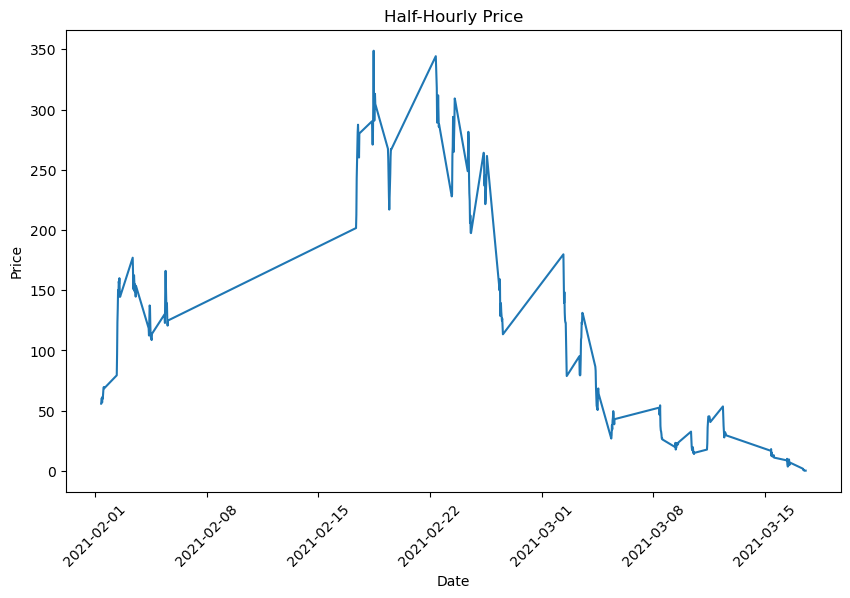

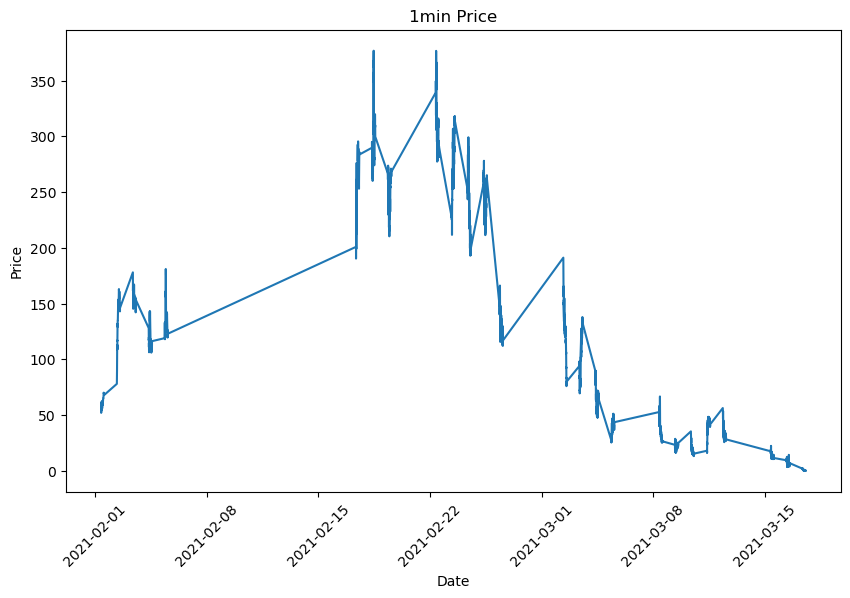

In [90]:
draw_daily_count_30min(month3_data_df_16500)
draw_daily_count_1min(month3_data_df_16500)

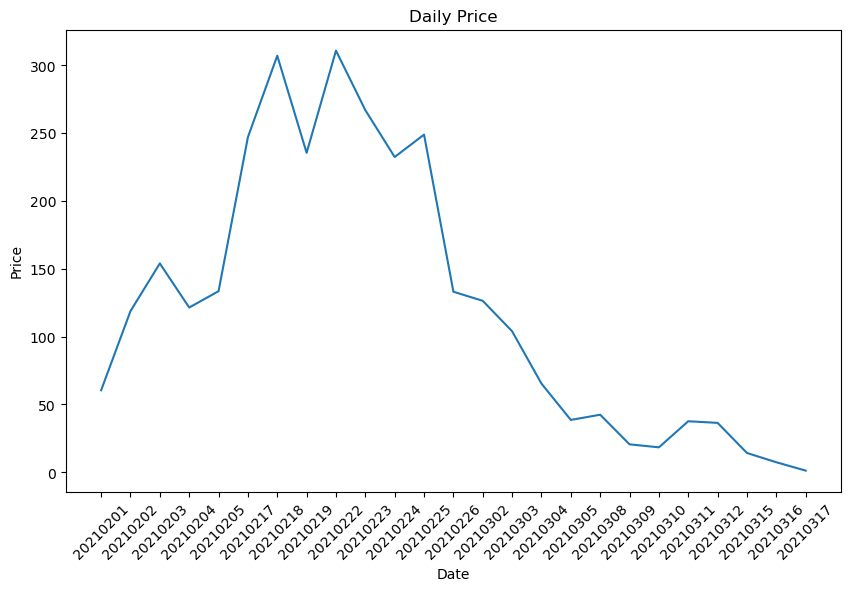

KeyboardInterrupt: 

In [38]:
draw_daily_count(month3_data_df_16500)
draw_daily_change(month3_data_df_16500)

In [23]:
daily_price.index

Index([20210201, 20210202, 20210203, 20210204, 20210205, 20210217, 20210218,
       20210219, 20210222, 20210223, 20210224, 20210225, 20210226, 20210302,
       20210303, 20210304, 20210305, 20210308, 20210309, 20210310, 20210311,
       20210312, 20210315, 20210316, 20210317],
      dtype='int64', name='MTF_DATE')

In [3]:
import matplotlib.pyplot as plt

# 繪製圖表
plt.figure(figsize=(10, 6))
plt.plot(month3_data_df['datetime'], month3_data_df['MTF_PRICE'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price over Time')
plt.show()

KeyboardInterrupt: 